In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

import warnings
warnings.filterwarnings("ignore")

In [3]:
train_df = pd.read_csv("Titanic_train.csv")
test_df  = pd.read_csv("Titanic_test.csv")

print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


In [4]:
train_df.info()
train_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
test_df.info()
test_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
full_df = pd.concat([train_df, test_df], axis=0)

In [7]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [8]:
full_df['Age'].fillna(full_df['Age'].median(), inplace=True)
full_df['Fare'].fillna(full_df['Fare'].median(), inplace=True)
full_df['Embarked'].fillna(full_df['Embarked'].mode()[0], inplace=True)

In [9]:
full_df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [10]:
le = LabelEncoder()
full_df['Sex'] = le.fit_transform(full_df['Sex'])
full_df['Embarked'] = le.fit_transform(full_df['Embarked'])

In [11]:
train_processed = full_df[full_df['Survived'].notna()]
test_processed  = full_df[full_df['Survived'].isna()]

X = train_processed.drop(['Survived', 'PassengerId'], axis=1)
y = train_processed['Survived']

X_test_final = test_processed.drop(['Survived', 'PassengerId'], axis=1)

In [12]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [13]:
gb_model = GradientBoostingClassifier(
    n_estimators=150,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gb_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, n_estimators=150,
                           random_state=42)

In [14]:
gb_pred = gb_model.predict(X_val)

print("Gradient Boosting Performance")
print("Accuracy :", accuracy_score(y_val, gb_pred))
print("Precision:", precision_score(y_val, gb_pred))
print("Recall   :", recall_score(y_val, gb_pred))
print("F1 Score :", f1_score(y_val, gb_pred))
print(classification_report(y_val, gb_pred))

Gradient Boosting Performance
Accuracy : 0.8044692737430168
Precision: 0.8
Recall   : 0.7027027027027027
F1 Score : 0.7482014388489209
              precision    recall  f1-score   support

         0.0       0.81      0.88      0.84       105
         1.0       0.80      0.70      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [15]:
ada_model = AdaBoostClassifier(
    n_estimators=150,
    learning_rate=0.5,
    random_state=42
)

ada_model.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.5, n_estimators=150, random_state=42)

In [16]:
ada_pred = ada_model.predict(X_val)

print("AdaBoost Performance")
print("Accuracy :", accuracy_score(y_val, ada_pred))
print("Precision:", precision_score(y_val, ada_pred))
print("Recall   :", recall_score(y_val, ada_pred))
print("F1 Score :", f1_score(y_val, ada_pred))
print(classification_report(y_val, ada_pred))

AdaBoost Performance
Accuracy : 0.7988826815642458
Precision: 0.7878787878787878
Recall   : 0.7027027027027027
F1 Score : 0.7428571428571429
              precision    recall  f1-score   support

         0.0       0.81      0.87      0.83       105
         1.0       0.79      0.70      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



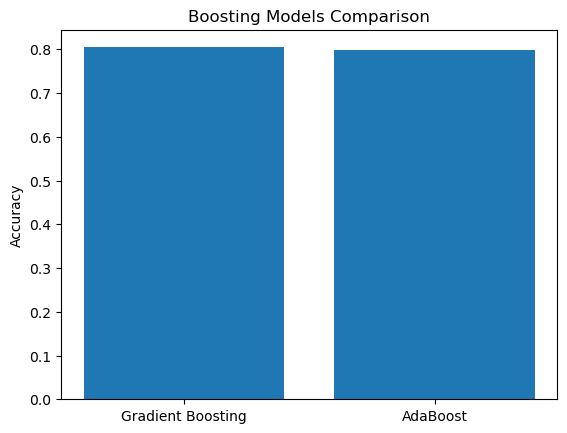

In [17]:
models = ['Gradient Boosting', 'AdaBoost']
accuracy = [
    accuracy_score(y_val, gb_pred),
    accuracy_score(y_val, ada_pred)
]

plt.bar(models, accuracy)
plt.ylabel("Accuracy")
plt.title("Boosting Models Comparison")
plt.show()

In [18]:
final_model = GradientBoostingClassifier(
    n_estimators=150,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

final_model.fit(X, y)

GradientBoostingClassifier(learning_rate=0.05, n_estimators=150,
                           random_state=42)

In [19]:
test_predictions = final_model.predict(X_test_final)

In [20]:
submission = pd.DataFrame({
    'PassengerId': test_processed['PassengerId'],
    'Survived': test_predictions.astype(int)
})

submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [21]:
submission.to_csv("titanic_boosting_predictions.csv", index=False)

In [22]:
df = pd.read_csv("titanic_boosting_predictions.csv")

In [23]:
df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [25]:
df.shape

(418, 2)

In [26]:
df.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.322967
std,120.810458,0.468170
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000
